
<center><h1>Assignment 1</h1></center>
<center><h4>Athina Ibanez Oktaviolla || PYTN-KS01-009</h4></center>
<hr>

In [1]:
#Library yang digunakan
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import folium
%matplotlib inline

In [2]:
#membaca data
df = pd.read_csv("dataset/london_crime_by_lsoa.csv")

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
df.describe(include = "O")

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Other Theft
freq,3456,602100,3966300,522180


In [6]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


### 1. Bar Chart

In [7]:
#slicing data: mengambil 3 kolom yang dibutuhkan
df_bar = df[["borough","value", "year"]]

#filter data hanya di tahun 2016
df_bar_filter = df_bar[(df_bar.year == 2016)]
df_bar_filter

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
3,Redbridge,0,2016
9,Sutton,1,2016
14,Hillingdon,0,2016
...,...,...,...
13490538,Southwark,5,2016
13490565,Westminster,0,2016
13490574,Kensington and Chelsea,0,2016
13490579,Sutton,0,2016


In [8]:
#mengambil kategori dari borough(wlayah), untuk dijadikan label
xlabel = df_bar_filter["borough"].unique()

#menghitung berapa label di sumbu x yang harus dibuat 
lengthx = np.arange(len(xlabel))

#menjumlahkan kriminal per borough(wilayah)
sums = df_bar_filter.groupby("borough").sum()
total = sums["value"].to_numpy()

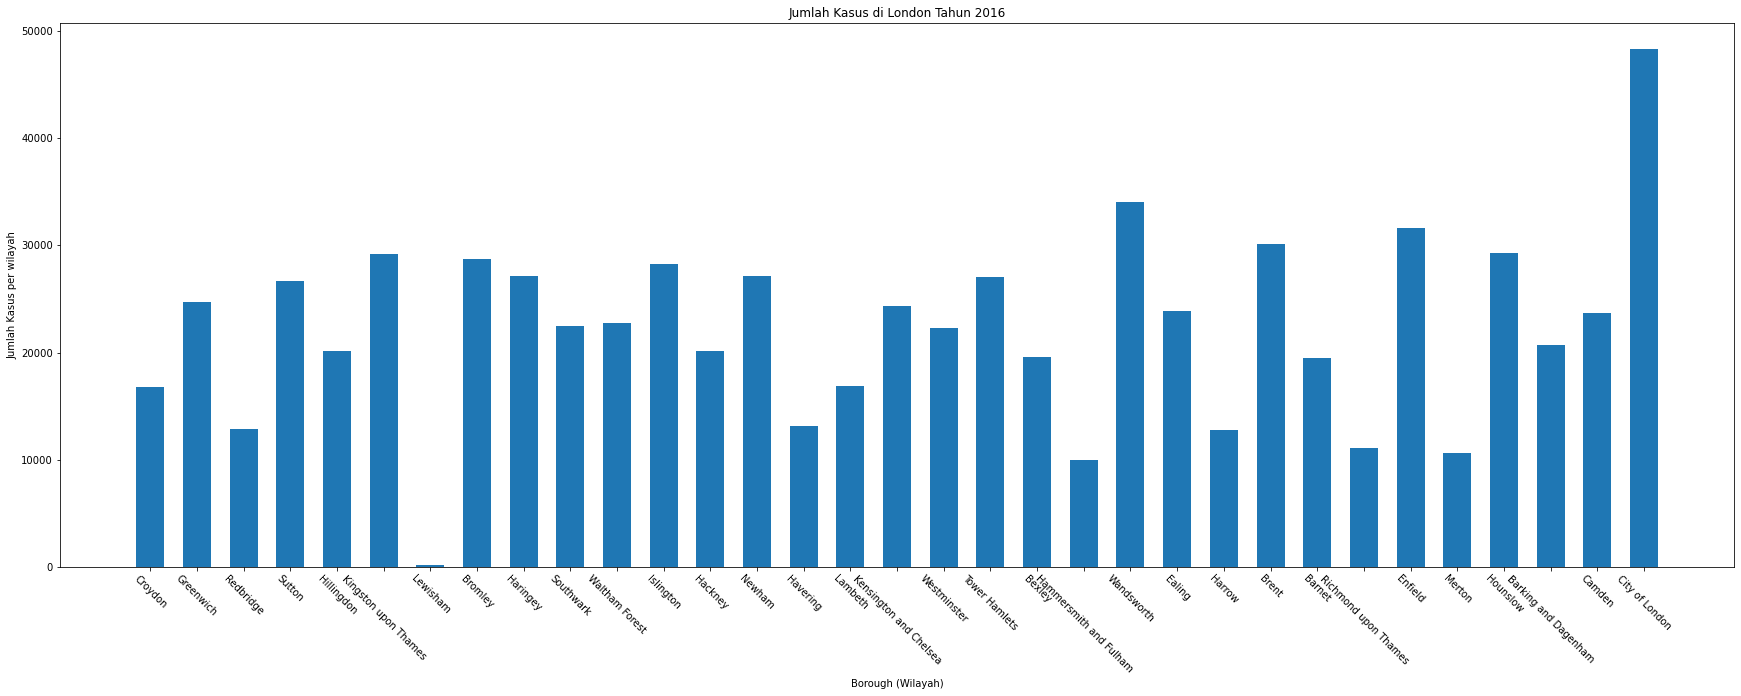

In [9]:
#memvisualisasikan jumlah kriminalitas per borough(wilayah) di tahun 2016
plt.figure(figsize=(30,10))
plt.bar(lengthx, total, width=0.6)

plt.xticks(lengthx, xlabel)
plt.xticks(rotation=-45)
plt.xlabel('Borough (Wilayah)')
plt.ylabel('Jumlah Kasus per wilayah')
plt.title('Jumlah Kasus di London Tahun 2016')
plt.show()

### 2. PIE CHART

In [10]:
#Melakukan slicing dengan mengambil
#4 kolom (borough, major_category, value, year)

df_pie = df[["borough","major_category", "value","year"]]
df_pie.head()

,borough,major_category,value,year
0,Croydon,Burglary,0,2016
1,Greenwich,Violence Against the Person,0,2016
2,Bromley,Violence Against the Person,0,2015
3,Redbridge,Burglary,0,2016
4,Wandsworth,Robbery,0,2008


In [11]:
#Melakukan filter dari dataframe yang sudah di slicing
df_pie_filter = df_pie[(df_pie.borough == "Croydon")]
df_pie_filter.head()

,borough,major_category,value,year
0,Croydon,Burglary,0,2016
42,Croydon,Drugs,0,2010
43,Croydon,Theft and Handling,1,2014
55,Croydon,Violence Against the Person,0,2012
83,Croydon,Drugs,0,2008


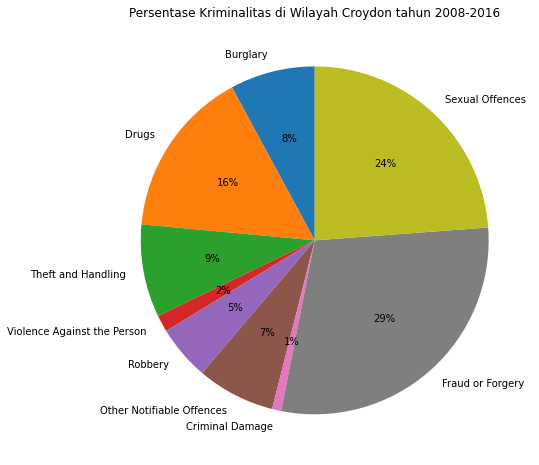

In [12]:
#Memvisualisasikan persentase kriminalitas (major_category)
#sejak tahun 2008-2016 di wilayah Croydon
values = df_pie_filter.groupby(["major_category"]).size()
label = df_pie_filter["major_category"].unique()
plt.figure(figsize=(12,8))
plt.pie(values, labels = label, autopct="%1.0f%%", startangle=90)
plt.title("Persentase Kriminalitas di Wilayah Croydon tahun 2008-2016")
plt.show()

### 3. AREA PLOT

In [13]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [14]:
#mengambil 2 kolom yang dibutuhkan
df_area = df[["year", "value"]]
df_area.head()

,year,value
0,2016,0
1,2016,0
2,2015,0
3,2016,0
4,2008,0


In [15]:
#menjumlahkan kolom value berdasarkan tahun yang di kelompokkan
df_group = df_area.groupby("year").sum()

#kolom tahun sebagai label
label_area = df["year"].unique()

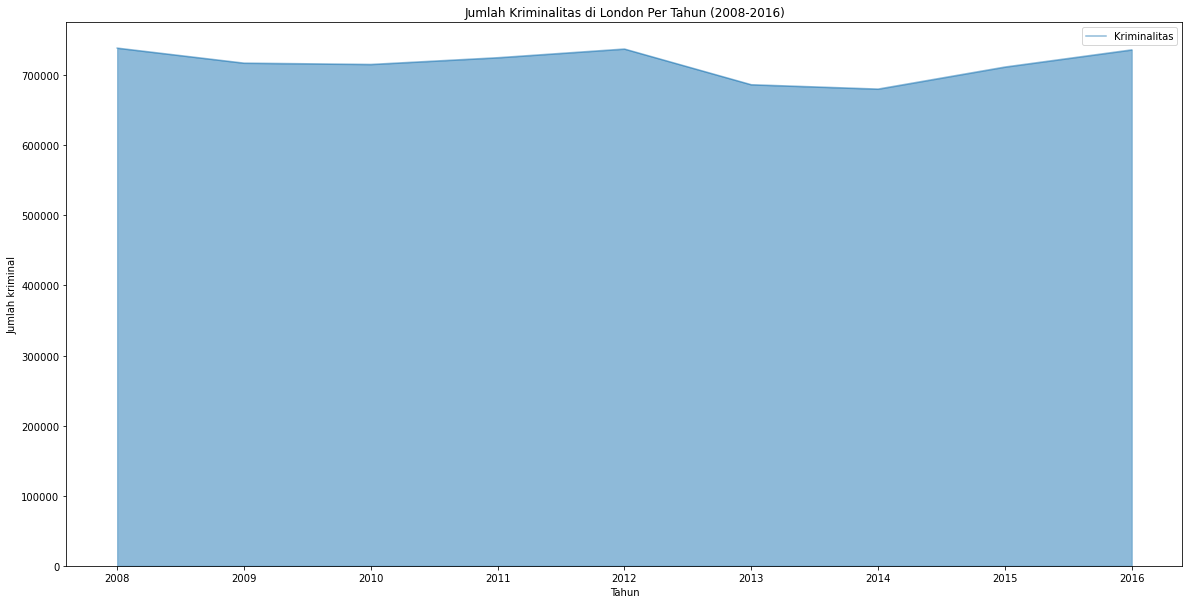

In [16]:
#Memvisualisasikan data (Area Plot) 
df_group.plot(kind="area", alpha=0.5, figsize=(20,10))
plt.ylabel("Jumlah kriminal")
plt.xlabel("Tahun")
plt.title("Jumlah Kriminalitas di London Per Tahun (2008-2016)")
plt.legend(["Kriminalitas"], loc="upper right")
plt.show()

### 4. BOX PLOT

In [17]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [18]:
#membuat dataframe baru dengan hanya tiga kolom ang dibutuhkan
new_df = df[["borough","value","year"]]
new_df

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
2,Bromley,0,2015
3,Redbridge,0,2016
4,Wandsworth,0,2008
...,...,...,...
13490599,Brent,0,2015
13490600,Hillingdon,1,2015
13490601,Sutton,0,2011
13490602,Croydon,0,2011


In [19]:
#membuat dataframe baru dengan  filter pada wilayah Croydon
filter_croydon = new_df[df.borough == "Croydon"]

#membuat dataframe baru dengna filter pada wilayah Brent
filter_brent = new_df[df.borough  == "Brent"]

In [20]:
#menjumlahkan kolom value yang sudah dikategorikan berdasarkan tahun
filter_croydon= filter_croydon.groupby("year").sum()

#mengganti nama kolom
filter_croydon=filter_croydon.rename(columns={"value":"croydon"})
filter_croydon

,croydon
year,
2008,29516
2009,29784
2010,29373
2011,29830
2012,30189
2013,27444
2014,27357
2015,28089
2016,28712


In [21]:
#menjumlahkan kolom value yang sudah dikategorikan berdasarkan tahun
filter_brent= filter_brent.groupby("year").sum()

#mengganti nama kolom
filter_brent= filter_brent.rename(columns={"value":"brent"})
filter_brent

,brent
year,
2008,23504
2009,24748
2010,25512
2011,27669
2012,26357
2013,23759
2014,24426
2015,24883
2016,26693


In [22]:
#menggabungkan dua dataframe dengan menambahkan kolom croydon pada dataframe brent.
#data dari kolom croydon diambil dari dataframe croydon
filter_brent["croydon"] = filter_croydon["croydon"]
newest_box = filter_brent
newest_box

,brent,croydon
year,,
2008,23504,29516
2009,24748,29784
2010,25512,29373
2011,27669,29830
2012,26357,30189
2013,23759,27444
2014,24426,27357
2015,24883,28089
2016,26693,28712


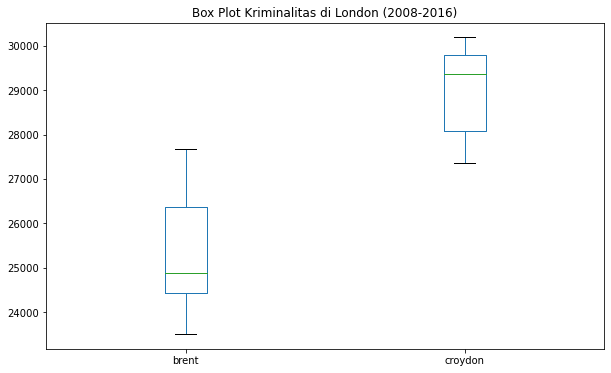

In [23]:
#Memvisualisasikan data (box plot)
newest_box.plot(kind='box', figsize=(10,6))
plt.title("Box Plot Kriminalitas di London (2008-2016)")
plt.show()

### 5. HISTOGRAM

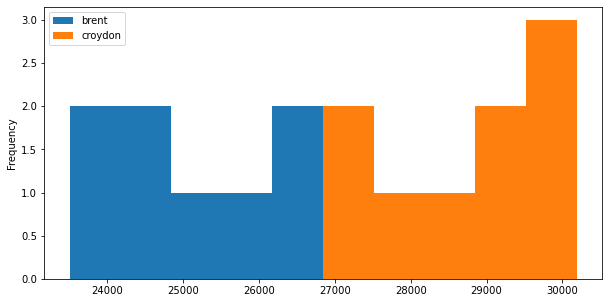

In [24]:
#Memvisualisasikan data (histogram)
newest_box.plot(kind='hist', figsize=(10,5))
plt.show()

### 6. SCATTER PLOT

In [25]:
#melakukan riset index pada dataframe newest_box
scatter_df = newest_box.reset_index()
scatter_df

,year,brent,croydon
0,2008,23504,29516
1,2009,24748,29784
2,2010,25512,29373
3,2011,27669,29830
4,2012,26357,30189
5,2013,23759,27444
6,2014,24426,27357
7,2015,24883,28089
8,2016,26693,28712


<Figure size 864x432 with 0 Axes>

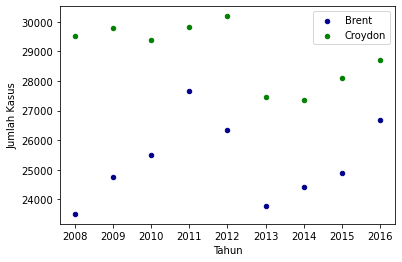

In [26]:
#memvisualisasikan data (Scatter Plot)
plt.figure(figsize=(12,6))
ax0 = scatter_df.plot(kind="scatter", x="year", y="brent", color='darkblue')
ax1 = scatter_df.plot(kind="scatter", x="year", y="croydon", color='green', ax=ax0)

ax0.set_xlabel("Tahun")
ax0.set_ylabel("Jumlah Kasus")
ax0.legend(["Brent","Croydon"], loc="upper right")
plt.show()

### 7. WORD CLOUDS

In [27]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [28]:
#Membuat sebuah test dengan melakukan perulangan pada kolom borough.
new_text = " ".join(str(i) for i in df.borough)

#Hanya mengambil 60 kata
wc = WordCloud(max_words=60, background_color='white').generate(new_text)

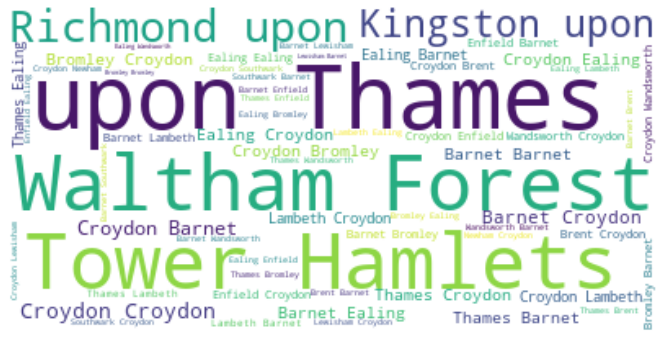

In [29]:
#membuat visualisasi wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 8. FOLIUM MAPS

disini saya menambahkan dua kolom karena tidak ada kolom latitude dan longitude dari dataset yang ada. 

In [30]:
#mengambil kategori dari kolom borough untuk dijadikan series baru
df_borough = df["borough"].unique()
df_borough

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [31]:
#membuat series latitude
df_lat = np.array([51.376495, 51.477928, 51.407421, 51.58861, 51.58861])

#membuat series longitude
df_long = np.array([-0.100594, -0.001545, 0.013062, 0.082398, 0.082398])

In [32]:
#Membuat dataframe baru dengna menggabungkan series df_borough, df_lat, dan df_long
maps_data = pd.DataFrame({"borough": pd.Series(df_borough), "lat": pd.Series(df_lat), "long": pd.Series(df_long)})

#Menghapus baris yang memilliki nilai NaN
maps_data = maps_data.dropna()

In [36]:
#menampilan peta London
latitude = 51.509865
longitude = -0.118092
london_map = folium.Map(location=[latitude, longitude], zoom_start=10)

In [34]:
maps_data

,borough,lat,long
0,Croydon,51.376495,-0.100594
1,Greenwich,51.477928,-0.001545
2,Bromley,51.407421,0.013062
3,Redbridge,51.588610,0.082398
4,Wandsworth,51.588610,0.082398


In [35]:
marker = folium.map.FeatureGroup()

#melakukan iterasi pada dataset maps_data untuk dijadikan marker pada peta
for lat, long, in zip(maps_data.lat, maps_data.long):
    marker.add_child(
        folium.CircleMarker(
            [lat, long],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ))

london_map.add_child(marker)

## KESIMPULAN

1. Jumlah kriminalitas tertinggi pada tahun 2016 ada pada wilayah "City of London", dapat dilihat pada BAR CHART yang telah dibuat.
2. Kriminalitas (major_category) tertinggi di Wilayah Croydon dari tahun 2008-2016 adalah kategori Fraud & Forgery, dapat dilihat pada PIE CHART.
3. Jumlah Kriminalitas terendah di London adalah pada tahun 2014, dapat ilihat di AREA PLOT.
4. Pada Box Plot terlihat median croydon cukup tinggi, sedangkan brent rendah
5. Pada Plot Histogram terlihat grafik kriminalitas di wilayah brent lebih sedikit dari croydon.
6. Pada Scatter Plot terlihat jumlah kriminalitas terendah di brent berada pada tahun 2008 dan croydon pada tahun 2014.
7. Pada wordcloud wilaya yang paling sering muncul untuk 60 kata pertama adalah Thames